# Paris

This notebook illustrates the hierarchical clustering of graphs by the [Paris algorithm](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()

**Clustering**

In [4]:
paris = skn.hierarchy.Paris('python')

In [5]:
paris.fit(adjacency)

Paris(engine='python')

In [6]:
dendrogram = paris.dendrogram_

**Visualization**

In [7]:
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

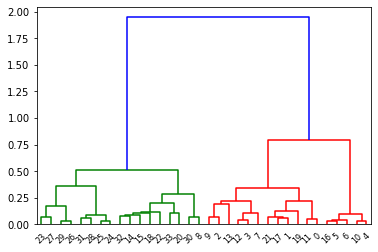

In [9]:
# Warning: If the image does not appear, run the cell again.
show_ = show_dendrogram(dendrogram)

**Cuts of the dendrogram**

In [10]:
# default = 2 clusters
labels = skn.hierarchy.straight_cut(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1] [17 17]


In [12]:
# cut with 4 clusters
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 4)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 2 2 2 2 1 2 1 1]


In [13]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12  9  8  5]


**Visualization**

In [14]:
from networkx import from_scipy_sparse_matrix, draw

In [15]:
graph = from_scipy_sparse_matrix(adjacency)

In [16]:
colors = ['r','g','b','c','m','y']

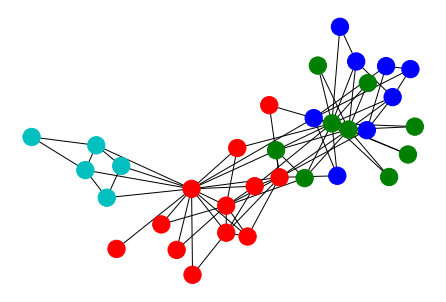

In [18]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph])

**Metrics**

In [19]:
skn.hierarchy.dasgupta_cost(adjacency, dendrogram)

0.3333333333333333

In [20]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.48732965660552824

**Parameters**

In [21]:
# default engine = numba if available
paris = skn.hierarchy.Paris()
paris.fit(adjacency)

Paris(engine='numba')

## Directed graphs

**Loading**

In [22]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)

**Clustering**

In [23]:
paris = skn.hierarchy.Paris('python')

In [24]:
paris.fit(adjacency)

Paris(engine='python')

In [25]:
dendrogram = paris.dendrogram_

**Visualization**

In [26]:
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

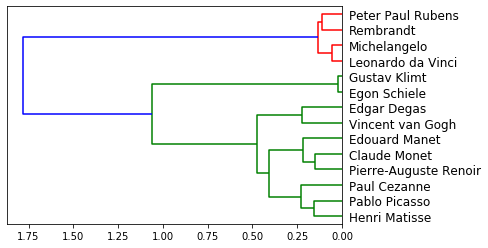

In [27]:
# Warning: If the image does not appear, run the cell again.
show_ = show_dendrogram(dendrogram, labels=list(names.values()), orientation='left')

**Cuts of the dendrogram**

In [28]:
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters=3)
print(labels)

[0 0 1 0 1 1 2 0 0 1 0 0 0 2]


In [29]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2] [8 4 2]


**Visualization**

In [30]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

In [31]:
graph = from_scipy_sparse_matrix(adjacency,create_using=DiGraph())

In [32]:
colors = ['r','g','b','c','m','y']

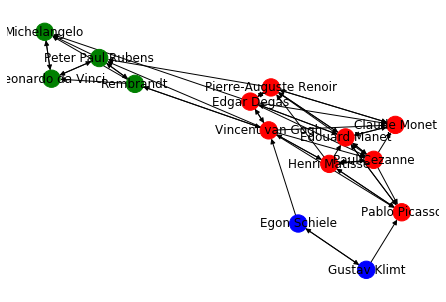

In [34]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph],labels = names)

## Bipartite graphs

**Loading**

In [35]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [36]:
paris = skn.hierarchy.Paris('python')

In [37]:
paris.fit(biadjacency)

Paris(engine='python')

In [38]:
dendrogram = paris.dendrogram_

**Visualization**

In [39]:
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

In [40]:
names = list(movies.values()) + list(actors.values()) 

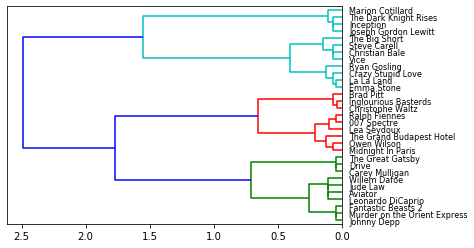

In [41]:
# Warning: If the image does not appear, run the cell again.
show_ = show_dendrogram(dendrogram, labels=names, orientation='left')

**Cuts of the dendrogram**

In [42]:
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters=3)
print(labels)

[0 0 0 1 1 0 0 0 2 1 2 2 2 1 1 1 0 0 0 0 2 1 0 0 2 2 1 1 2 1 2]


In [43]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2] [12 10  9]


**Visualization**

In [44]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [45]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [46]:
graph = from_scipy_sparse_matrix(adjacency)

In [47]:
colors = ['r','g','b','c','m','y']

In [48]:
n1,n2 = biadjacency.shape
pos = {i: (0,i) for i in range(n1)}
pos.update({n1 + i: (2,i) for i in range(n2)})

In [49]:
pos_labels = {i: (0.5,i) for i in range(n1)}
pos_labels.update({n1 + i: (1.5,i) for i in range(n2)})

In [50]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

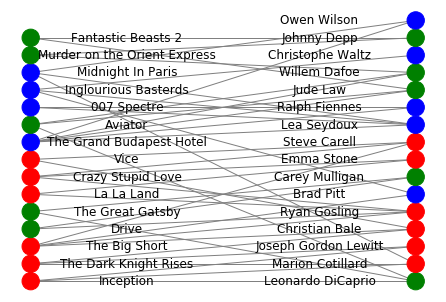

In [51]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[labels[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)